In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import io
import scipy.io.wavfile as wav
from scipy.linalg import toeplitz, inv
from math import *

#plt.rcParams['figure.figsize']=(6,4)

# LINEAR PREDICTIVE CODING
## Primera parte 

In [39]:
# Carga de los valores numéricos de la señal
(Fs,fantasia) = wav.read('./tp1/fantasia.wav')
fantasia = fantasia.astype(float)/32767

W = round(0.025*Fs);
D = round(0.010*Fs);

x = np.copy(fantasia)
x_vent = x[14000:14000+W]

#x_fft = np.fft.fft(x_vent,1024)
#f = np.fft.fftfreq(1024,0.25/2)
#print(np.correlate(x_fft,x_fft,mode=2))

#x = [1,2,3,4,5,6,7,8,9,10]
#print(x[0:-1])


In [40]:
def funcionlpc(senial_w, cant_coefs):
    # La función lpc recibe una señal ventaneada senial_w y la cantidad de coeficientes cant_coefs
    # para luego realizar el cálculo de los coeficientes del filtro de Wiener
    M = cant_coefs     # Renombro para notación más sencilla
    r = np.correlate(senial_w, senial_w, mode=2)   # Cálculo de la correlación
    r = r[round(len(r)/2)-1:round(len(r)/2 + M)] # Sólo interesan los M coeficientes
    r0 = r[0]
    R = toeplitz(r[0:-1])
    r = r[1:]

    a = np.dot(inv(R),r)
    G = sqrt(r0 - np.dot(a.T,r))
    return a, G

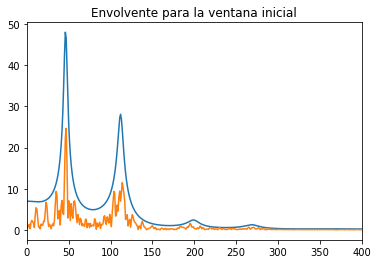

In [41]:
[a, G] = funcionlpc(x_vent, M)

a = np.hstack((1,-a))
[aux, a_fft] = signal.freqz(1,a)
plt.plot(abs(a_fft))
plt.plot(abs(x_fft))
plt.xlim(0,400)
plt.title('Envolvente para la ventana inicial')
plt.show()

In [47]:
M = 20         

#Calcular la cantidad de pasos a realizar:
Lpasos = ceil(len(x)/D)
extra_zeros = ceil(len(x)/W)*W-len(x)  # Agrego los ceros que faltan para la iteración
extra_zeros = np.zeros(extra_zeros)
x = np.concatenate((x, extra_zeros))

#Inicializar ai
for n in range(Lpasos):
    senial_w = x[(n*D):(n*D+W)]
    ai = funcionlpc(senial_w, M)
# For para almacenar los coeficientes ai en una matriz
#for n in range(Lpasos):
#    #ai[n] = funcionlpc(....

LinAlgError: singular matrix

In [ ]:
# Calcular el espectro de la envolvente a partir de los coeficientes ai de
# cada frame:

# Graficar espectro envolvente


# Graficar espectrograma

# Graficar espectros superpuesto de las 4 vocales en la señal (un frame por vocal)
# Identificar los picos, y realizar comentarios sobre la posición relacionado a la práctica de fonética.